# NSRR

### Imports

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
!cp "/content/drive/MyDrive/Research/Enhancing Video Resolution/previous networks/nsrr/implementation.zip" "/content/implementation.zip"
!unzip /content/implementation.zip -d .

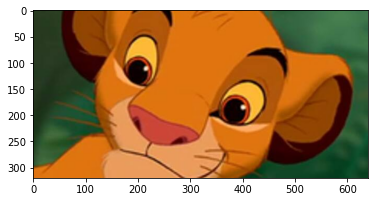

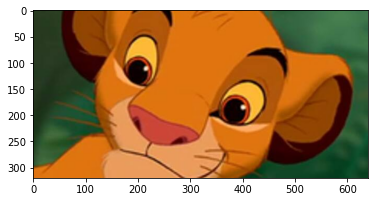

upscaling img from [3, 320, 640] -> [3, 640, 1280]
upscaling img from [3, 320, 640] -> [3, 640, 1280]


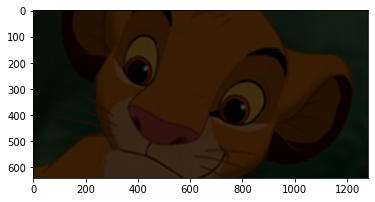

torch.Size([1, 3, 640, 1280])


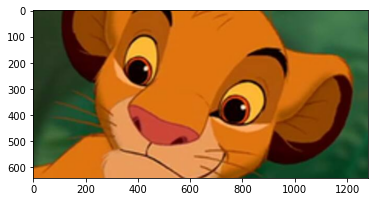

In [1]:
import torch
from implementation.nsrr_utils import *
%matplotlib inline
from matplotlib import pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
from torchvision import transforms
import torch.nn.functional as F
from kornia.color import rgba_to_rgb

home_dir =  "./implementation/"
img = "./implementation/inputs/img1.jpeg"
convert_tensor = transforms.ToTensor()
plt.imshow(mpimg.imread(img))
plt.show()
# img_tensor = rgba_to_rgb(convert_tensor(Image.open(img)))
img_tensor = convert_tensor(Image.open(img))
img2 = "./implementation/inputs/img1.jpeg"
plt.imshow(mpimg.imread(img2))
plt.show()
# img_tensor2 = rgba_to_rgb(convert_tensor(Image.open(img2)))
img_tensor2 = convert_tensor(Image.open(img2))
edge_kernel = torch.Tensor([[[0, -1, 0], [-1, 4, -1], [0, -1, 0]]])
upsampled_img = zero_upsampling(img_tensor, (2, 2)).cpu()
upsampled_img2 = zero_upsampling(img_tensor2, (2, 2)).cpu()
plt.imshow(upsampled_img.squeeze().permute(1,2,0))
plt.show()
t = torch.nn.Upsample(scale_factor=(2, 2), mode="nearest")(img_tensor.unsqueeze(0))
print(t.size())
plt.imshow(t.squeeze().permute(1,2,0))
plt.show()


In [2]:
# img_tensor = torch.Tensor([[[1, 2, 3], [4, 5, 6], [7, 8, 9]]])
img_tensor = upsampled_img.squeeze()
img_tensor2 = upsampled_img2.squeeze()

def wraper(img_t, x_motion):
    i, _, h, w = img_t.shape
    x = torch.arange(w).view(1, -1).repeat(h, 1).view(1, 1, h, w).repeat(i, 1, 1, 1)
    # print(x)
    y = torch.arange(h).view(-1, 1).repeat(1, w).view(1, 1, h, w).repeat(i, 1, 1, 1)
    # print(y)
    grid = torch.cat((x, y), 1).double().to(device=x_motion.device)
    print("grid", grid.shape)
    print("x_motion", x_motion.shape)
    grid += x_motion
    vgrid_x = grid[:, 0, :, :]
    vgrid_y = grid[:, 1, :, :]
    grid[:, 0, :, :] = (vgrid_x / w) * 2.0 - 1.0
    grid[:, 1, :, :] = (vgrid_y / h) * 2.0 - 1.0

    grid = grid.permute((0, 2, 3, 1))
    print("\n Grid\n", grid.shape)
    # print("\n Grid\n", grid)
    print("Img\n", img_t.shape)
    plt.imshow(img_tensor.squeeze().permute(1,2,0))
    plt.show()
    output = F.grid_sample(img_t, grid, mode='nearest', align_corners=False).squeeze()
    print("Output shape", output.shape)
    output[output == 0] = 255
    print(output.mean())
    plt.imshow(output[0].permute(1,2,0))
    plt.show()
    plt.imshow(output[1].permute(1,2,0))
    plt.show()
    # output = F.grid_sample(img_t, grid, mode='bilinear', align_corners=False)
    # print(output.shape)
    # plt.imshow(output.squeeze().permute(1,2,0))
    # plt.show()
    # output = F.grid_sample(img_t, grid, mode='bicubic', align_corners=False)
    # print(output.shape)
    # plt.imshow(output.squeeze().permute(1,2,0))
    # plt.show()

layers <_io.BufferedReader name='implementation/optical_flow/flownet2sd.json'>
Initializing ...
torch.Size([1, 3, 2, 640, 1280])
Analyzing ...
Preforming optical flow on input of size torch.Size([1, 6, 640, 1280]) ...
Concatinating: torch.Size([1, 512, 20, 40]) torch.Size([1, 512, 20, 40]) torch.Size([1, 2, 20, 40])
Concatinating: torch.Size([1, 512, 40, 80]) torch.Size([1, 256, 40, 80]) torch.Size([1, 2, 40, 80])
Concatinating: torch.Size([1, 256, 80, 160]) torch.Size([1, 128, 80, 160]) torch.Size([1, 2, 80, 160])
Concatinating: torch.Size([1, 128, 160, 320]) torch.Size([1, 64, 160, 320]) torch.Size([1, 2, 160, 320])
(160, 320, 2)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


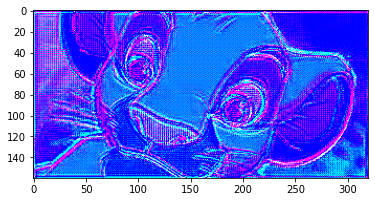

flow shape 1 torch.Size([2, 160, 320])
t1 shape torch.Size([1, 3, 2, 640, 1280])
flow shape 2 torch.Size([2, 2, 160, 320])
upscaling img from [2, 2, 160, 320] -> [2, 2, 640, 1280]
grid torch.Size([2, 2, 640, 1280])
x_motion torch.Size([2, 2, 640, 1280])

 Grid
 torch.Size([2, 640, 1280, 2])
Img
 torch.Size([2, 3, 640, 1280])


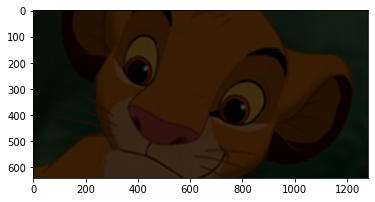

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Output shape torch.Size([2, 3, 640, 1280])
tensor(37.6445, dtype=torch.float64)


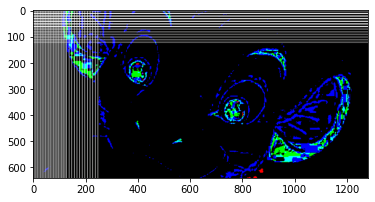

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


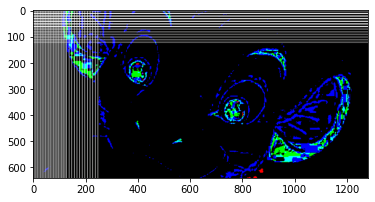

grid torch.Size([2, 2, 640, 1280])
x_motion torch.Size([2, 2, 640, 1280])

 Grid
 torch.Size([2, 640, 1280, 2])
Img
 torch.Size([2, 3, 640, 1280])


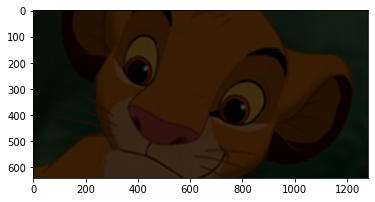

Output shape torch.Size([2, 3, 640, 1280])
tensor(43.0025, dtype=torch.float64)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


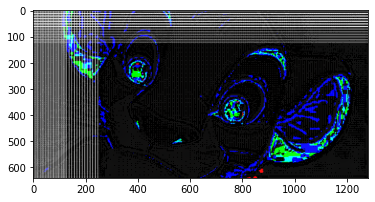

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


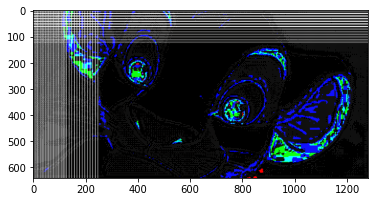

grid torch.Size([2, 2, 640, 1280])
x_motion torch.Size([2, 2, 640, 1280])

 Grid
 torch.Size([2, 640, 1280, 2])
Img
 torch.Size([2, 3, 640, 1280])


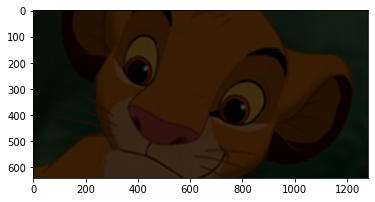

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Output shape torch.Size([2, 3, 640, 1280])
tensor(193.2905, dtype=torch.float64)


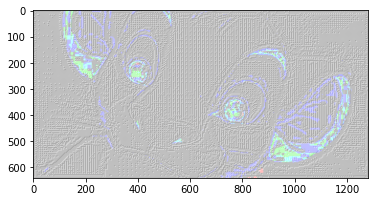

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


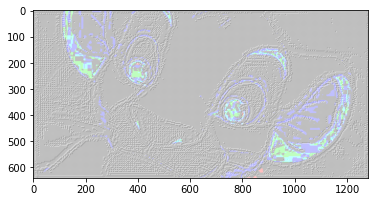

In [4]:
from implementation.optical_flow.flownet import FlowNet2SD
import numpy as np
class args:pass
args.fp16 = True
args.rgb_max = 255
net = FlowNet2SD(args)
net.initalize()
input_tensor = np.array([img_tensor.detach().numpy() / 255, img_tensor2.detach().numpy()  / 255]).transpose(1, 0, 2, 3)
input_tensor = torch.from_numpy(input_tensor.astype(np.float32)).unsqueeze(0)
print(input_tensor.shape)
results = net(input_tensor)
result = results[0].squeeze().detach().numpy().transpose(1,2,0)
print(result.shape)
h, w, c = result.shape
res = []
for i in range(h):
    row = []
    for j in range(w):
        result_pix = result[i][j]
        row.append(np.array(list(result_pix) + [255]))
    res.append(row)
res = np.array(res)
plt.imshow(res)
plt.show()
test_batch_size = 2
s = img_tensor.shape
flow2 = torch.Tensor(np.zeros([2, s[1], s[2]]))
flow = torch.Tensor(result).permute(2, 0, 1)
print(f"flow shape 1 {flow.shape}")
flow = torch.stack((flow.squeeze(),)*test_batch_size)
flow2 = torch.stack((flow2.squeeze(),)*test_batch_size)
print(f"t1 shape {input_tensor.shape}")
flow = flow.permute(1, 0, 2, 3)
print(f"flow shape 2 {flow.shape}")
# print(flow.squeeze().detach().numpy())
upsampled_t = zero_upsampling(flow.squeeze().detach().numpy(), (4, 4)).cpu()
upsampled_t2 = torch.nn.Upsample(scale_factor=(4, 4), mode="nearest")(flow.squeeze())
w = wraper(input_tensor.squeeze().permute(1, 0, 2, 3).double(), flow2.double()/255)
w = wraper(input_tensor.squeeze().permute(1, 0, 2, 3).double(), upsampled_t.double()/255)
w2 = wraper(input_tensor.squeeze().permute(1, 0, 2, 3).double(), upsampled_t2.double()/255)
